# Playing with the precision matrix of the hub graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from ddn3 import simulation
from ddn3_extra import simulation_r


In [2]:
omega, omega1, omega2 = simulation_r.huge_omega(
    n_node=100,
    ratio_diff=0.25,
    graph_type="hub",
    n_group=5,
)
g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)
# dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, 10000, 10000)


In [3]:
#        0  1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23
idx1 = [ 5, 23, 33, 35, 37, 43, 45, 48, 48, 48, 57, 66, 69, 69, 76, 79, 80, 85, 86, 87, 88, 92, 95, 97]
idx2 = [ 4, 13, 18,  7, 25, 15, 11,  0,  2, 27, 31,  1, 28, 59,  3, 29, 69, 15, 59, 21, 14, 12, 51, 13]
edge_strong = [ 1,  2,  3,  7,  9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 23]

# After removing edge 12, the correlation reach its peak 
# edge_remove_order = [8, 0, 5, 6, 15, 19, 4, 12, 10, 2, 3, 11, 14, 22, 9, 1, 17, 20, 21, 23, 7, 18, 13, 16]

0.043346702473676876
0.045354971050415714


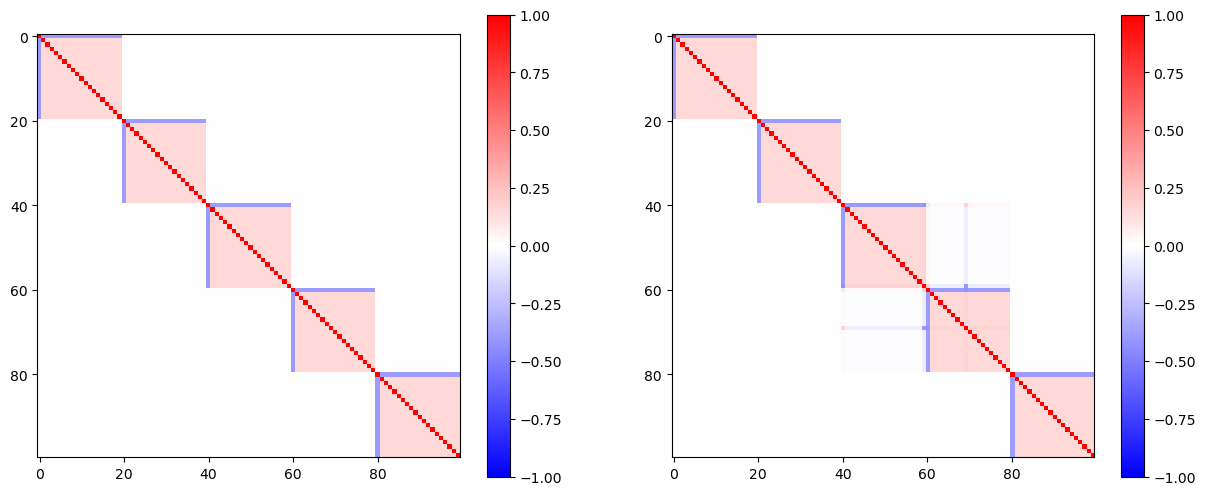

In [5]:
prec = np.copy(omega)
prec_mod = np.copy(omega)

# for ii in edge_strong:
for ii in [ 13]:
    prec_mod[idx1[ii], idx2[ii]] = 0.4132
    prec_mod[idx2[ii], idx1[ii]] = 0.4132

fig, ax = plt.subplots(1,2,figsize=(15, 6))
cov1, _ = simulation.create_cov_prec_mat(prec)
cov2, _ = simulation.create_cov_prec_mat(prec_mod)
print(np.mean(np.abs(cov1)))
print(np.mean(np.abs(cov2)))

im0 = ax[0].imshow(cov1, cmap="bwr")
im1 = ax[1].imshow(cov2, cmap="bwr")
im0.set_clim(-1,1)
im1.set_clim(-1,1)
fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])


In [349]:
# Check whether removing some edges will further enhance the overall absolution correlations among nodes
idx_sel = np.arange(len(idx1))
idx_scan_res = np.zeros(len(idx_sel))-1000
idx_bad = [8, 0, 5, 6, 15, 19, 4]
# idx_bad = [8, 0, 5, 6, 15, 19, 4, 12, 10, 2, 3, 11, 14, 22, 9, 1, 17, 20, 21, 23, 7, 18, 13, 16]
for i in range(len(idx_sel)):
    prec_mod_scan = np.copy(omega)
    if i in idx_bad:
        continue
    for ii in range(len(idx_sel)):
        if ii==i or ii in idx_bad:
            continue
        prec_mod_scan[idx1[ii], idx2[ii]] = 0.4132
        prec_mod_scan[idx2[ii], idx1[ii]] = 0.4132
    cov2, _ = simulation.create_cov_prec_mat(prec_mod_scan)
    idx_scan_res[i] = np.mean(np.abs(cov2))

print(idx_scan_res)
print(np.argmax(idx_scan_res))
print(np.max(idx_scan_res))

[-1.00000000e+03  3.08978790e-01  3.70901801e-01  3.70901801e-01
 -1.00000000e+03 -1.00000000e+03 -1.00000000e+03  1.86227434e-01
 -1.00000000e+03  3.11878848e-01  4.14021735e-01  3.37530823e-01
  5.63598277e-01  2.18489348e-01  3.37530823e-01 -1.00000000e+03
  1.88982072e-01  2.74206951e-01  2.42299571e-01 -1.00000000e+03
  2.74206951e-01  2.74206951e-01  3.23296169e-01  2.38379856e-01]
12
0.5635982768017046
